## Purpose
- load image from UR5 at a given position and display on screen + save to directory!

freedrive
freedrive finished


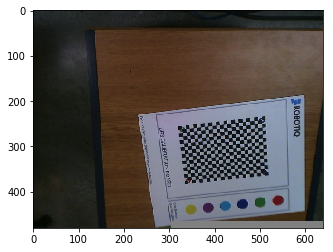

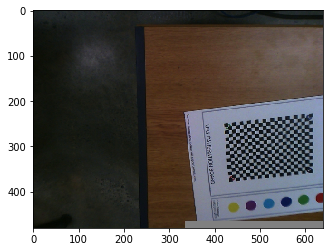

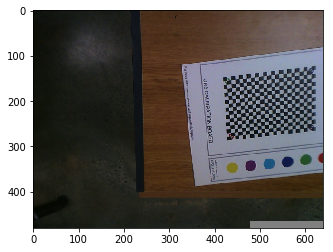

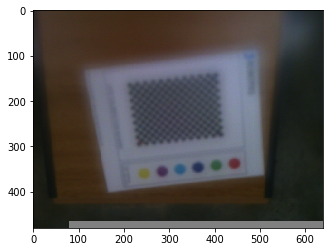

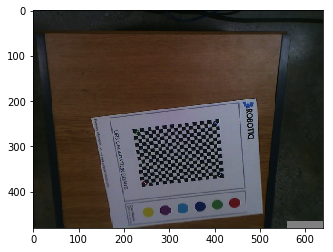

In [51]:
import urx
import logging
import time
import cv2
import requests
import shutil
import matplotlib.pyplot as plt
import time


a = 0.8
v = 1.2
l = 0.1

cam_init_pos = [-0.010697666798726857, -1.4970129171954554, -0.9410384337054651, -1.5029333273517054, -4.749510828648702, 0.04719312861561775]
bucket_pos = [1.6486937999725342, -2.4073990027057093, -1.8858941237079065, -0.36886865297426397, -4.742553655301229, 0.0471811443567276]

# connect to robot
rob = urx.Robot("192.168.1.6")

print("freedrive")
rob.set_freedrive(1, timeout=60)
time.sleep(10)
print("freedrive finished")


# move to initial pos
rob.movej(cam_init_pos, acc = a, vel = v)

get_image(1)



# translate
rob.translate((0, -l, 0), acc=a, vel=v)

get_image(2)
rob.translate((l, 0, 0), acc=a, vel=v)

get_image(3)
rob.translate((0, 2*l, 0), acc=a, vel=v)

get_image(4)
rob.translate((-l, 0, 0), acc=a, vel=v)

get_image(5)
rob.translate((0, -l, 0), acc=a, vel=v)

# rob.movej(bucket_pos, acc = a, vel = v)

rob.close()

In [29]:
def get_image(n):
    image_url = "http://192.168.1.6:4242/current.jpg?annotations=off"
    ## GETTING PHOTO
    resp = requests.get(image_url, stream=True)
    # Open a local file with wb ( write binary ) permission.
    img_string = 'local_image_' + str(n) + '.jpg'
    local_file = open(img_string, 'wb')
    # Set decode_content value to True, otherwise the downloaded image file's size will be zero.
    resp.raw.decode_content = True
    # Copy the response stream raw data to local image file.
    shutil.copyfileobj(resp.raw, local_file)
    # Remove the image url response object.
    del resp

    ## Displaying image
    img = cv2.imread(img_string, cv2.COLOR_BGR2RGB) #cv2.COLOR_BGR2RGB
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    